## step1: load the images

In [105]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def random_image(test_train,yes_no):
  if test_train=='train' and yes_no=='yes':
    path = '/content/drive/MyDrive/brain_tumor_train/train/yes'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  elif test_train=='train' and yes_no=='no':
    path = '/content/drive/MyDrive/brain_tumor_train/train/no'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  elif test_train=='test' and yes_no=='yes':
    path = '/content/drive/MyDrive/brain_tumor_train/test/yes'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  elif test_train=='test' and yes_no=='no':
    path = '/content/drive/MyDrive/brain_tumor_train/test/no'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  else:
    print("no such file or directory")

Y116.JPG


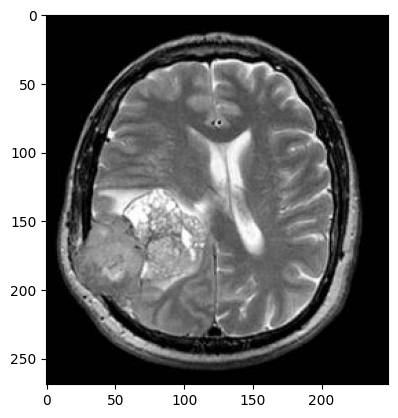

In [111]:
random_image('train','yes')

8 no.jpg


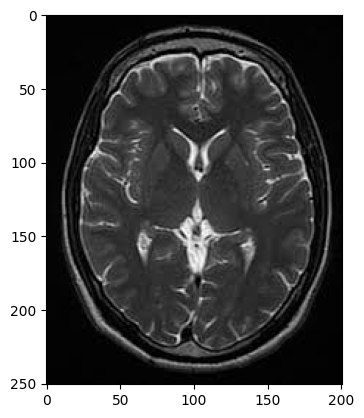

In [110]:
random_image('test','no')

Y95.jpg
21 no.jpg
Y4.jpg
10 no.jpg


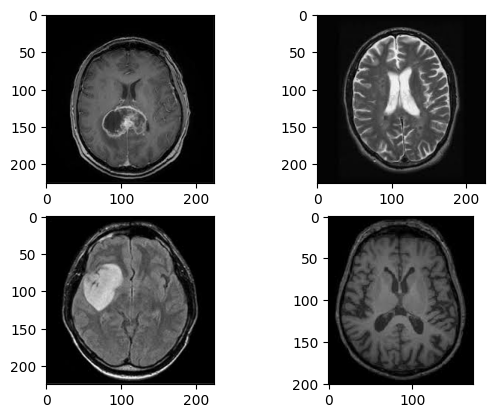

In [119]:
#visualize random images side by side
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(2,2,1)
random_image('train','yes')
plt.subplot(2,2,2)
random_image('train','no')
plt.subplot(2,2,3)
random_image('test','yes')
plt.subplot(2,2,4)
random_image('test','no')

## step2: preprocess the images

In [87]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#normalization of data values to 0 and 1
train_datagen=ImageDataGenerator(rescale=1./255) #divide all the pixel values by 255
valid_datagen=ImageDataGenerator(rescale=1./255) #divide all the pixel values by 255

#setup paths to directories
train_dir="/content/drive/MyDrive/brain_tumor_train/train"
test_dir="/content/drive/MyDrive/brain_tumor_train/test"

#import data from directories
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

#building the CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_1=tf.keras.models.Sequential()

model_1.add(Conv2D(filters=10,
                   kernel_size=3,
                   activation="relu",
                   input_shape=(224,224,3)))
model_1.add(Conv2D(filters=10,
                   kernel_size=3,
                   activation="relu"))
model_1.add(MaxPooling2D(pool_size=2
                         ,padding="valid"))
model_1.add(Conv2D(filters=10,
                   kernel_size=3,
                   activation="relu"))
model_1.add(Conv2D(filters=10,
                   kernel_size=3,
                   activation="relu"))
model_1.add(MaxPooling2D(2))
model_1.add(Flatten())
model_1.add(Dense(1,activation="sigmoid"))



Found 233 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## step3: compiling the model

In [93]:
model_1.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

## step4: compile the model

In [94]:
history_1=model_1.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))

Epoch 1/5
8/8 [==============================] - 58s 7s/step - loss: 0.6363 - accuracy: 0.6824 - val_loss: 0.6227 - val_accuracy: 0.6500
Epoch 2/5
8/8 [==============================] - 16s 2s/step - loss: 0.5148 - accuracy: 0.8069 - val_loss: 0.5915 - val_accuracy: 0.6000
Epoch 3/5
8/8 [==============================] - 16s 2s/step - loss: 0.4704 - accuracy: 0.8069 - val_loss: 0.5998 - val_accuracy: 0.6500
Epoch 4/5
8/8 [==============================] - 15s 2s/step - loss: 0.4145 - accuracy: 0.8197 - val_loss: 0.5621 - val_accuracy: 0.7000
Epoch 5/5
8/8 [==============================] - 16s 2s/step - loss: 0.3978 - accuracy: 0.8412 - val_loss: 0.5438 - val_accuracy: 0.7000


In [95]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

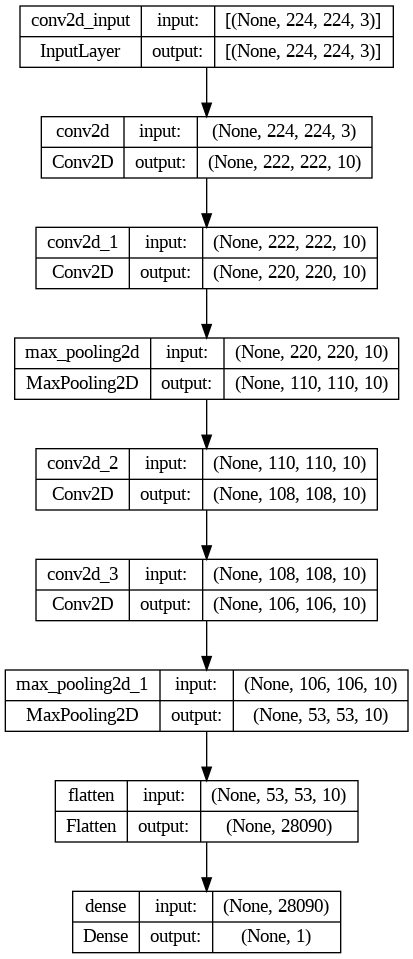

In [124]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)